# Model creation and Prediction:

<b>Programmer: Souparna Bose<b>

<b>Import required libraries<b>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<b>Load dataset into a pandas DataFrame<b>

In [2]:
df = pd.read_csv('trainingData.csv')

<b>Display all columns in dataset<b>

In [5]:
pd.set_option('display.max_column',None)
df.head()

,Id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
0,1,Dhanbad,22,F,Mochi,Tailoring,Others,36000.0,5000.0,0,2,1.0,R,4,70.0,1.0,0.5,Apparels,12,12,5000.0
1,2,Manjapra,21,F,OBC,Tailoring,none,94000.0,3600.0,1,1,1.0,T1,4,80.0,1.0,0.5,Apparels,12,50,7500.0
2,3,Dhanbad,24,M,Nai,Beauty salon,Others,48000.0,4000.0,0,2,1.0,T1,4,50.0,1.0,0.5,Beauty Salon,12,12,5000.0
3,4,NaN,26,F,OBC,Tailoring,none,7000.0,5000.0,0,2,1.0,T1,5,50.0,1.0,0.5,Apparels,12,50,7500.0
4,5,Nuapada,23,F,OBC,General store,Agriculture,36000.0,3500.0,0,0,1.0,T1,1,112.0,1.0,0.5,Retail Store,12,12,5000.0


In [6]:
df.shape

(40000, 21)

<b>Drop redundant features from dataset for model training<b>

In [8]:
df.drop(['Id','city','age','sex','social_class','primary_business','secondary_business','old_dependents','young_dependents','type_of_house'],axis=1,inplace=True)

In [9]:
df.head()

,annual_income,monthly_expenses,home_ownership,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
0,36000.0,5000.0,1.0,4,70.0,1.0,0.5,Apparels,12,12,5000.0
1,94000.0,3600.0,1.0,4,80.0,1.0,0.5,Apparels,12,50,7500.0
2,48000.0,4000.0,1.0,4,50.0,1.0,0.5,Beauty Salon,12,12,5000.0
3,7000.0,5000.0,1.0,5,50.0,1.0,0.5,Apparels,12,50,7500.0
4,36000.0,3500.0,1.0,1,112.0,1.0,0.5,Retail Store,12,12,5000.0


In [10]:
df.drop(['occupants_count','sanitary_availability','water_availabity','loan_purpose','loan_tenure','loan_installments'],axis=1,inplace=True)

<b>Final dataset having only relevant features for model prediction<b>

In [11]:
df.head()

,annual_income,monthly_expenses,home_ownership,house_area,loan_amount
0,36000.0,5000.0,1.0,70.0,5000.0
1,94000.0,3600.0,1.0,80.0,7500.0
2,48000.0,4000.0,1.0,50.0,5000.0
3,7000.0,5000.0,1.0,50.0,7500.0
4,36000.0,3500.0,1.0,112.0,5000.0


<b>Checking for outliers in the dataset with the help of boxplots<b>

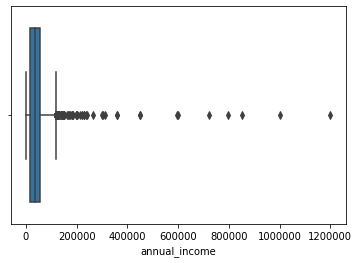

In [12]:
sns.boxplot(x=df['annual_income'])

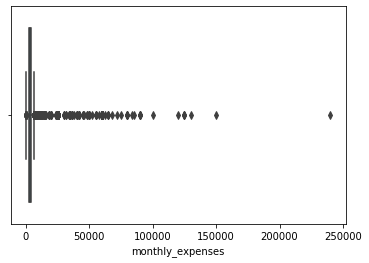

In [13]:
sns.boxplot(x=df['monthly_expenses'])

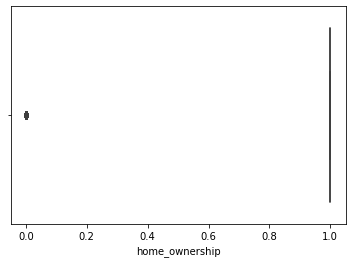

In [14]:
sns.boxplot(x=df['home_ownership'])

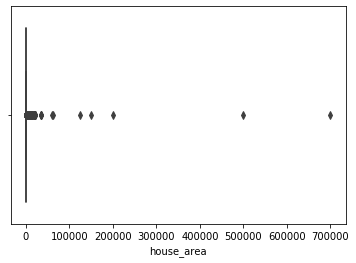

In [15]:
sns.boxplot(x=df['house_area'])

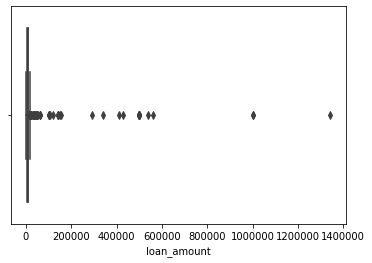

In [16]:
sns.boxplot(x=df['loan_amount'])

<b>Checking for missing values in the dataset<b>

In [18]:
df.isnull().sum()

annual_income         0
monthly_expenses    120
home_ownership      379
house_area            0
loan_amount           0
dtype: int64

<b>Calculating Z score for all features in the dataset<b>

In [19]:
from scipy import stats

z = np.abs(stats.zscore(df))
print(z)

[[0.05707326        nan        nan 0.10502915 0.25098556]
 [1.96110726        nan        nan 0.10285375 0.06711834]
 [0.36048133        nan        nan 0.10937994 0.25098556]
 ...
 [0.36048133        nan        nan 0.01026684 0.03034489]
 [0.36048133        nan        nan 0.01026684 0.03034489]
 [1.19559052        nan        nan 0.01026684 0.03034489]]


<b>Since the no of missing values are very small compared to the dataset, we are going to drop those for training our model<b>

In [22]:
df.dropna(inplace=True)

<b>Re-checking for missing values<b>

In [23]:
df.isnull().sum()

annual_income       0
monthly_expenses    0
home_ownership      0
house_area          0
loan_amount         0
dtype: int64

<b>Checking and printing outlier data<b>

In [30]:
z = np.abs(stats.zscore(df))

threshold = 3
print(np.where(z > 3))
print('\n')
print(np.where(z > 3))

(array([   14,    15,    20, ..., 39591, 39593, 39593], dtype=int64), array([2, 2, 2, ..., 4, 1, 4], dtype=int64))


(array([   14,    15,    20, ..., 39591, 39593, 39593], dtype=int64), array([2, 2, 2, ..., 4, 1, 4], dtype=int64))


<b>Shape of dataset after removing missing values<b>

In [31]:
df.shape

(39607, 5)

In [33]:
new_df = df[(z>3).all(axis=1)]

In [34]:
new_df.shape

(0, 5)

In [35]:
df.shape

(39607, 5)

<b>Forming new dataset excluding the outliers<b>

In [37]:
ref_df = df[(z<3).all(axis=1)]

In [39]:
ref_df.shape

(38187, 5)

<b>Splitting the dataset into training and testing sets<b>

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
ref_df.head()

,annual_income,monthly_expenses,home_ownership,house_area,loan_amount
0,36000.0,5000.0,1.0,70.0,5000.0
1,94000.0,3600.0,1.0,80.0,7500.0
2,48000.0,4000.0,1.0,50.0,5000.0
3,7000.0,5000.0,1.0,50.0,7500.0
4,36000.0,3500.0,1.0,112.0,5000.0


In [44]:
X = ref_df.drop(['loan_amount'],axis=1).values

In [45]:
X.shape

(38187, 4)

In [46]:
y = ref_df['loan_amount'].values

In [47]:
y.shape

(38187,)

<b>Splitting the dataset<b>

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

In [50]:
print(X_train.shape,'\t',X_test.shape,'\t',y_train.shape,'\t',y_test.shape,'\t',)

(26730, 4) 	 (11457, 4) 	 (26730,) 	 (11457,) 	


<b>Creating Linear Regression Model<b>

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
lg_model = LinearRegression()

<b>Scaling the data<b>

In [53]:
from sklearn.preprocessing import MinMaxScaler

In [54]:
scaler = MinMaxScaler()

In [55]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<b>Model training and prediction<b>

In [56]:
lg_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
pred_lg = lg_model.predict(X_test)

<b>Model evaluation metrics<b>

In [60]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [70]:
print(mean_absolute_error(y_test,pred_lg))
print(mean_squared_error(y_test,pred_lg))
print(np.sqrt(mean_squared_error(y_test,pred_lg)))
print(r2_score(y_test,pred_lg))

2306.6192815188533
8277725.786806463
2877.103714989514
0.11477411415994243


<b>Creating an Artificial Neural Network using keras and tensorflow for model training and prediction<b>

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

<b>Defining model parameters and Compiling the ANN<b>

In [65]:
dl_model = Sequential()

dl_model.add(Dense(80,activation='relu'))
dl_model.add(Dense(50,activation='relu'))
dl_model.add(Dense(20,activation='relu'))

dl_model.add(Dense(1))

dl_model.compile(optimizer='rmsprop',loss='mse')

<b>ANN Model training and prediction<b>

In [68]:
dl_model.fit(X_train,y_train,epochs=500,verbose=0,validation_data=(X_test,y_test))

In [71]:
pred_dl = dl_model.predict(X_test)

<b>ANN model evaluation metrics<b>

In [72]:
print(mean_absolute_error(y_test,pred_dl))
print(mean_squared_error(y_test,pred_dl))
print(np.sqrt(mean_squared_error(y_test,pred_dl)))
print(r2_score(y_test,pred_dl))

1954.43169950259
6711335.628026043
2590.6245633101767
0.2822849923395032


<b>As seen from above, the ANN model performs better compared to LinearRegression. However, there is scope for further improvement by tuning hyperparameters as well as checking for predictions including other features<b> 